#### Jupyter notebook that analyze the data generated by the Scipion3 VDS workflow 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import re
def natural_sort(listi, rev=False):
  convert = lambda text: int(text) if text.isdigit() else text.lower()
  alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)', key)]
  return sorted(listi, key=alphanum_key, reverse=rev)

def custom_sort(strings, rev=False):
    def extract_number(s):
        # Use regular expression to extract numeric values (both integers and decimals)
        match = re.search(r'[-+]?\d*\.\d+|\d+', s)
        if match:
            return float(match.group())
        else:
            return float('inf')  # Return positive infinity if no number found
    
    # Sort the strings based on the extracted numeric values
    sorted_strings = sorted(strings, key=extract_number, reverse=rev)
    
    return sorted_strings

#### PyPlot bar figure generator for the images ####

In [3]:
def barPlot(valDic, linesDic={}, optionLabel='poses', y2Log=True, save='', nticks=None, maxPerc=None, maxMols=None,
           annotateLines=False, legendPos='upper center', labOrder=[], analysisTitle='Consensus'):
    fig, ax1 = plt.subplots()

    if len(labOrder) > 0:
        perLabels = labOrder
    else:
        perLabels = list(valDic.keys())
    perValues = [100*valDic[k] for k in perLabels]
                         
    ax1.bar(perLabels, perValues, label=f'Percentage of active {optionLabel}')
    ax1.set_xlabel(f'{analysisTitle} subset')
    ax1.set_ylabel('Percentage of actives (%)', color='b')
    ax1.tick_params('y', colors='b')
    ax1.tick_params(axis='x', rotation=90)
    ax1.grid(True, linestyle='--', zorder=0, axis='y')

    if len(linesDic) > 0:
        ax2 = ax1.twinx()
        totValues = [linesDic[k] for k in perLabels]
        ax2.plot(perLabels, totValues, marker='o', color='red', label=f'Total number of {optionLabel}', linewidth=1)
        ax2.set_ylabel(f'Total number of {optionLabel}', color='r')
        ax2.tick_params('y', colors='r')
        if y2Log:
            ax2.set_yscale('log')

        if annotateLines:
        # Muestra los valores encima de cada punto del gráfico de líneas
            for x, y in zip(perLabels, totValues):
                if y <=100:
                    ax2.annotate(f'{y}', (x, y), textcoords="offset points", xytext=(0,10), ha='center', fontsize='small', color='r')


    if nticks and maxPerc and maxMols:
        # Configura los ticks en el eje Y para ambos ejes
        num_ticks = nticks  # Número de ticks deseados en el eje Y
        tickPos1 = np.linspace(0, maxPerc, num_ticks)  
        tickPos2 = np.linspace(0, maxMols, num_ticks)
        ax1.set_yticks(tickPos1)
        ax2.set_yticks(tickPos2)
        ax1.set_ylim(0, maxPerc)
        ax2.set_ylim(0, maxMols)

    
    if legendPos: 
        lines, labels = ax1.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax2.legend(lines + lines2, labels + labels2, loc=legendPos, fontsize='small')
    
    plt.title(f'Enrichment for {analysisTitle}')
    if save:
        plt.savefig(save, bbox_inches='tight')
    plt.show()

In [4]:
df = pd.read_csv('FABP4_workflow_VDSResults.csv')
df = df.rename(columns={'InConsensus_2': 'InConsensus_100_n2', 'InConsensus_3': 'InConsensus_100_n3'})

In [5]:
df

,Unnamed: 0,UniqueName,MolName,Type,ROI_ID,PoseFile,Energy,ODDTScore,InConsensus_100_n2,InConsensus_100_n3,...,InConsensus_50_n3,InConsensus_50_n2,InConsensus_0.5_n3,InConsensus_0.5_n2,InConsensus_0.1_n3,InConsensus_0.1_n2,InConsensus_0.05_n3,InConsensus_0.05_n2,InConsensus_0.01_n3,InConsensus_0.01_n2
0,0,g1_CHEMBL452596-1_1_669,CHEMBL452596,AutodockVina,1,Runs/000669_ProtChemVinaDocking/extra/pocket_1...,-8.958000e+00,8.220806,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,g1_CHEMBL452596-1_2_669,CHEMBL452596,AutodockVina,1,Runs/000669_ProtChemVinaDocking/extra/pocket_1...,-8.740000e+00,8.870444,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2,g1_CHEMBL452596-1_3_669,CHEMBL452596,AutodockVina,1,Runs/000669_ProtChemVinaDocking/extra/pocket_1...,-8.695000e+00,9.070488,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3,g1_CHEMBL452596-1_4_669,CHEMBL452596,AutodockVina,1,Runs/000669_ProtChemVinaDocking/extra/pocket_1...,-8.579000e+00,8.464902,False,False,...,False,False,False,False,False,False,False,False,False,False
4,4,g1_CHEMBL452596-1_5_669,CHEMBL452596,AutodockVina,1,Runs/000669_ProtChemVinaDocking/extra/pocket_1...,-8.460000e+00,8.084277,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282090,282090,g2_ZINC50768531-3_1_517,ZINC50768531,Autodock4,2,Runs/000517_ProtChemAutodockGPU/outputLigands/...,6.730000e+07,-113.656769,False,False,...,False,False,False,False,False,False,False,False,False,False
282091,282091,g2_ZINC50768531-3_2_517,ZINC50768531,Autodock4,2,Runs/000517_ProtChemAutodockGPU/outputLigands/...,6.720000e+07,-108.055344,False,False,...,False,False,False,False,False,False,False,False,False,False
282092,282092,g2_ZINC50768531-3_3_517,ZINC50768531,Autodock4,2,Runs/000517_ProtChemAutodockGPU/outputLigands/...,3.360000e+07,-62.513172,False,False,...,False,False,False,False,False,False,False,False,False,False
282093,282093,g2_ZINC50768531-3_4_517,ZINC50768531,Autodock4,2,Runs/000517_ProtChemAutodockGPU/outputLigands/...,5.030000e+07,-44.426807,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
cKeys = []
for col in df.columns:
    if 'consensus' in col.lower():
        cKeys.append(col)
cKeys = custom_sort(cKeys, rev=True)


In [7]:
cKeys = ['InConsensus_100_n3', 'InConsensus_100_n2', 
         'InConsensus_50_n3', 'InConsensus_50_n2', 
         'InConsensus_10_n3', 'InConsensus_10_n2', 
         'InConsensus_5_n3', 'InConsensus_5_n2', 
         'InConsensus_1_n3', 'InConsensus_1_n2', 
         'InConsensus_0.5_n3', 'InConsensus_0.5_n2', 
         'InConsensus_0.1_n3', 'InConsensus_0.1_n2', 
         'InConsensus_0.05_n3', 'InConsensus_0.05_n2', 
         'InConsensus_0.01_n3', 'InConsensus_0.01_n2']

In [8]:
activeDF, decoyDF = df[df['Active']], df[df['Active']==False]

### Enrichment on docking poses for the different Filter + Consensus protocols ###

In [9]:
#ŧodo: check this data and plot 

consPosesDic, totalPoses = {}, {}
print(f"Proportion of actives/total poses in:")

totalPoses['All'] = len(activeDF) + len(decoyDF)
consPosesDic['All'] = len(activeDF)/totalPoses['All']
print(f"All molecules:\t\t {100*consPosesDic['All']:.2f}% \t({len(activeDF)}/{totalPoses['All']})")

for k in cKeys:
    kDic = k.replace('InConsensus_', '%').replace('_n', '_N')
    consDF, nConsDF = df[df[k]], df[df[k]==False]
    consActDF, consDecDF = consDF[consDF['Active']], consDF[consDF['Active']==False]

    totalPoses[kDic] = len(consActDF) + len(consDecDF)
    consPosesDic[kDic] = len(consActDF)/totalPoses[kDic] if not totalPoses[kDic]==0 else 0
    
    print(f'{k}:\t {100*consPosesDic[kDic]:.2f}% \t({len(consActDF)}/{totalPoses[kDic]})')

Proportion of actives/total poses in:
All molecules:		 1.70% 	(4791/282095)
InConsensus_100_n3:	 1.49% 	(21/1412)
InConsensus_100_n2:	 2.21% 	(161/7273)
InConsensus_50_n3:	 1.20% 	(21/1748)
InConsensus_50_n2:	 1.84% 	(151/8187)
InConsensus_10_n3:	 3.82% 	(24/629)
InConsensus_10_n2:	 4.63% 	(133/2873)
InConsensus_5_n3:	 6.63% 	(22/332)
InConsensus_5_n2:	 7.38% 	(113/1531)
InConsensus_1_n3:	 16.18% 	(11/68)
InConsensus_1_n2:	 14.57% 	(51/350)
InConsensus_0.5_n3:	 26.32% 	(10/38)
InConsensus_0.5_n2:	 24.42% 	(42/172)
InConsensus_0.1_n3:	 12.50% 	(1/8)
InConsensus_0.1_n2:	 31.58% 	(12/38)
InConsensus_0.05_n3:	 0.00% 	(0/5)
InConsensus_0.05_n2:	 15.38% 	(2/13)
InConsensus_0.01_n3:	 0.00% 	(0/0)
InConsensus_0.01_n2:	 0.00% 	(0/2)


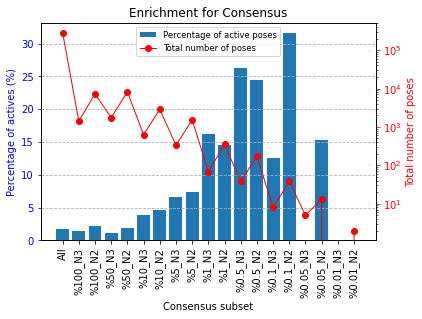

In [10]:
barPlot(consPosesDic, totalPoses, save='Consensus_poses', y2Log=True)

### Enrichment on molecules for the different Filter + Consensus protocols ###

In [11]:
oriActives, oriDecoys = 47, 2749
nAct, nDec = len(set(activeDF['MolName'])), len(set(decoyDF['MolName']))

consMolsDic, totalMols = {}, {}

for k in cKeys:
    kDic = k.replace('InConsensus_', '%').replace('_n', '_N')
    consDF, nConsDF = df[df[k]], df[df[k]==False]
    consActDF, consDecDF = consDF[consDF['Active']], consDF[consDF['Active']==False]
    nActCons, nDecCons = len(set(consActDF['MolName'])), len(set(consDecDF['MolName']))

    totalMols[kDic] = nActCons + nDecCons
    consMolsDic[kDic] = nActCons / totalMols[kDic] if not totalMols[kDic]==0 else 0

    print(f"{k}: \t{100*consMolsDic[kDic]:.2f}% ({nActCons}/{totalMols[kDic]})")

InConsensus_100_n3: 	1.89% (12/635)
InConsensus_100_n2: 	2.20% (39/1772)
InConsensus_50_n3: 	1.76% (13/737)
InConsensus_50_n2: 	1.91% (36/1885)
InConsensus_10_n3: 	4.00% (14/350)
InConsensus_10_n2: 	3.44% (34/987)
InConsensus_5_n3: 	7.53% (14/186)
InConsensus_5_n2: 	5.75% (34/591)
InConsensus_1_n3: 	13.95% (6/43)
InConsensus_1_n2: 	11.18% (18/161)
InConsensus_0.5_n3: 	26.92% (7/26)
InConsensus_0.5_n2: 	15.12% (13/86)
InConsensus_0.1_n3: 	16.67% (1/6)
InConsensus_0.1_n2: 	29.17% (7/24)
InConsensus_0.05_n3: 	0.00% (0/3)
InConsensus_0.05_n2: 	11.11% (1/9)
InConsensus_0.01_n3: 	0.00% (0/0)
InConsensus_0.01_n2: 	0.00% (0/2)


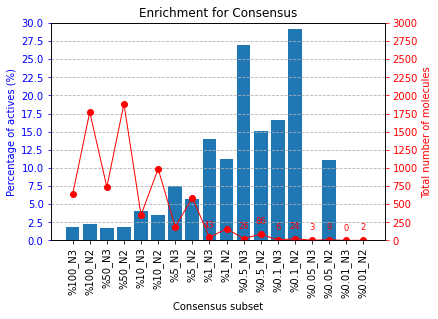

In [12]:
barPlot(consMolsDic, totalMols, optionLabel='molecules', y2Log=False, save='images/Consensus_molecules', nticks=13, maxPerc=30, 
        maxMols=3000, annotateLines=True, legendPos='')

In [13]:
df.shape

(282095, 27)

### ENRICHMENT FOR JUST HIGHEST SCORES ###

In [15]:
props = [0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001]
nSizes = {f'%{p*100}': round(df.shape[0] * p) for p in props}
print(nSizes)

{'%50.0': 141048, '%10.0': 28210, '%5.0': 14105, '%1.0': 2821, '%0.5': 1410, '%0.1': 282, '%0.05': 141, '%0.01': 28}


In [16]:
print(f"Proportion of actives/total molecules in:")
bestMolsDic, bestTotMols = {}, {}

bestTotMols['Original'] = oriActives + oriDecoys
bestMolsDic['Original'] = oriActives/bestTotMols['Original']
print(f"All molecules: \t\t{100*bestMolsDic['Original']:.2f}% ({oriActives}/{bestTotMols['Original']})")

bestTotMols['%100'] = nAct + nDec
bestMolsDic['%100'] = nAct/bestTotMols['%100']
print(f"Ligand filtered: \t{100*bestMolsDic['%100']:.2f}% ({nAct}/{bestTotMols['%100']})")


for nLabel, nSize in nSizes.items():
    curDF = df.nlargest(nSize, 'ODDTScore')
    bestActDF, bestDecDF = curDF[curDF['Active']], curDF[curDF['Active']==False]

    nMolsAct, nMolsDec = len(set(bestActDF['MolName'])), len(set(bestDecDF['MolName']))
    bestTotMols[nLabel] = nMolsAct + nMolsDec
    bestMolsDic[nLabel] = nMolsAct / bestTotMols[nLabel]

    print(f"Highest {nLabel} ODDT Scores: \t{100*bestMolsDic[nLabel]:.2f}% ({nMolsAct}/{bestTotMols[nLabel]})")



Proportion of actives/total molecules in:
All molecules: 		1.68% (47/2796)
Ligand filtered: 	1.73% (46/2656)
Highest %50.0 ODDT Scores: 	1.79% (46/2564)
Highest %10.0 ODDT Scores: 	2.44% (38/1557)
Highest %5.0 ODDT Scores: 	3.34% (36/1079)
Highest %1.0 ODDT Scores: 	6.10% (21/344)
Highest %0.5 ODDT Scores: 	8.57% (18/210)
Highest %0.1 ODDT Scores: 	17.19% (11/64)
Highest %0.05 ODDT Scores: 	12.50% (5/40)
Highest %0.01 ODDT Scores: 	0.00% (0/8)


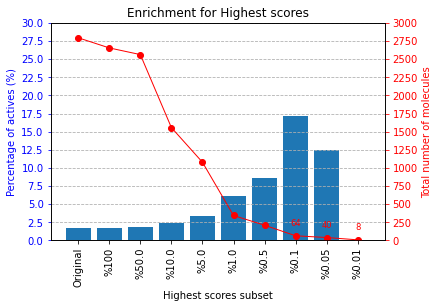

In [17]:
barPlot(bestMolsDic, bestTotMols, optionLabel='molecules', y2Log=False, save='images/bestScored_molecules', nticks=13, maxPerc=30, maxMols=3000, annotateLines=True,
       legendPos='', analysisTitle='Highest scores')

### Combining enrichment of filtered vs filtered + consensus N2 protocols ###

In [19]:
subsetsPropDic = {**consMolsDic, **bestMolsDic}
subsetsTotDic = {**totalMols, **bestTotMols}


In [20]:
n2Keys = ['Original', '%100', '%100_N2',
          '%50.0', '%50_N2',
          '%10.0', '%10_N2',
          '%5.0', '%5_N2',
          '%1.0', '%1_N2',
          '%0.5', '%0.5_N2',
          '%0.1', '%0.1_N2',
          '%0.05', '%0.05_N2',
          '%0.01', '%0.01_N2',]

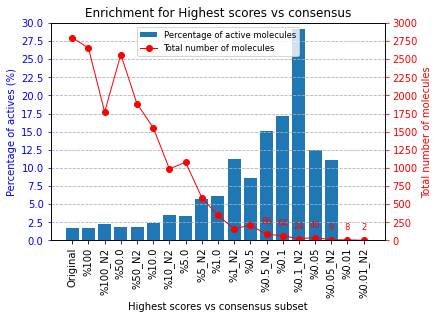

In [21]:
barPlot(subsetsPropDic, subsetsTotDic, optionLabel='molecules', y2Log=False, save='images/bestScoredVSConsN2_molecules', 
        nticks=13, maxPerc=30, maxMols=3000, annotateLines=True,
        legendPos='upper center', analysisTitle='Highest scores vs consensus', labOrder=n2Keys)

### Combining enrichment of filtered vs filtered + consensus N3 protocols ###

In [22]:
n3Keys = ['Original', '%100', '%100_N3',
          '%50.0', '%50_N3',
          '%10.0', '%10_N3',
          '%5.0', '%5_N3',
          '%1.0', '%1_N3',
          '%0.5', '%0.5_N3',
          '%0.1', '%0.1_N3',
          '%0.05', '%0.05_N3',
          '%0.01', '%0.01_N3',]

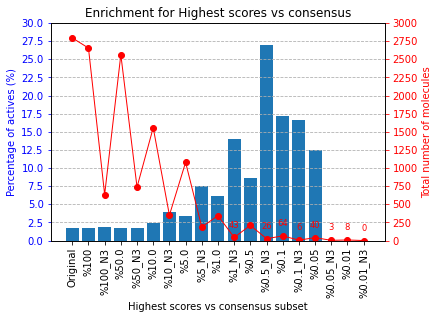

In [23]:
barPlot(subsetsPropDic, subsetsTotDic, optionLabel='molecules', y2Log=False, save='images/bestScoredVSConsN3_molecules', 
        nticks=13, maxPerc=30, maxMols=3000, annotateLines=True,
        legendPos='', analysisTitle='Highest scores vs consensus', labOrder=n3Keys)

## COMBINING RESULS WITH EXPERIMENTAL VALUES ##

In [25]:
def parseExpValues(activeFile, nMFile):
    expValDic, smi2idDic = {}, {}
    with open(activeFile) as f:
        for line in f:
            sline = line.split()
            smi2idDic[sline[0]] = sline[-1]

    with open(nMFile) as f:
        for line in f:
            sline = line.split()
            smi, type, value, unit = sline[0], sline[2], sline[4], sline[5]
            expValDic[smi2idDic[smi]] = {'smi': smi, 'affType': type, 'affValue': value, 
                                         'affUnit': unit}
    return expValDic

In [26]:
# Getting a dictionary with the affinity values of the actives
activeISMFile = '../workflows/workflow_fabp4/actives_final.ism'
activeNMFile = '../workflows/workflow_fabp4/actives_nM_combined.ism'

expValDic = parseExpValues(activeISMFile, activeNMFile)

In [27]:
activeDF, decoyDF = df[df['Active']], df[df['Active']==False]

In [28]:
#Getting the best score for each of the active molecules poses
bestScoreIndices = activeDF.groupby('MolName')['ODDTScore'].idxmax()
bestScDF = activeDF.loc[bestScoreIndices]

scDic = bestScDF[['MolName', 'ODDTScore']].set_index('MolName').to_dict()['ODDTScore']


In [29]:
kiValuesDic = {k: float(v['affValue']) for k, v in expValDic.items() if v['affType'] == 'Ki'}
ic50ValuesDic = {k: float(v['affValue']) for k, v in expValDic.items() if v['affType'] == 'IC50'}

In [30]:
def getMolLabels(scDic, expDic):
    molLabels = []
    for k in expDic:
        if k in scDic:
            molLabels.append(k)
    return molLabels

def getSubDic(dic, keyList):
    sd = {}
    for k in keyList:
        if k in dic:
            sd[k] = dic[k]
    return sd

def plotScatter(scDic, expDic, expDic2={}, expType='Ki', expType2='IC50', annotate=False, 
               markMols=[], save=''):
    fig, ax1 = plt.subplots()

    molLabels = getMolLabels(scDic, expDic)
    scValues = [scDic[k] for k in molLabels]
    expValues = [expDic[k] for k in molLabels]
                         
    ax1.scatter(scValues, expValues)
    ax1.set_xlabel('ODDT score values')
    ax1.set_ylabel(f'Experimental {expType} nM values', color='b')
    ax1.set_xlim(4, max(scValues)+1)
    ax1.tick_params('y', colors='b')
    ax1.grid(True, linestyle='--', zorder=0)

    if len(markMols) > 0:
        markMolLabels = getMolLabels(scDic, markMols)
        markExpDic = getSubDic(expDic, markMolLabels)
        if len(markExpDic) > 0:
            markMolLabels = markExpDic.keys()
            
            markScValues = [scDic[k] for k in markMolLabels]
            markExpValues = list(markExpDic.values())
    
            ax1.scatter(markScValues, markExpValues, marker='*', s=20, color='y')  # Highlighted points with asterisk

    if len(expDic2) > 0:
        ax2 = ax1.twinx()
        ax2.set_ylabel(f'Experimental {expType2} nM values', color='r')
        ax2.tick_params('y', colors='r')

        molLabels2 = getMolLabels(scDic, expDic2)
        scValues2 = [scDic[k] for k in molLabels2]
        expValues2 = [expDic2[k] for k in molLabels2]
        ax2.scatter(scValues2, expValues2, color='r')

        if len(markMols) > 0:
            markMolLabels = getMolLabels(scDic, markMols)
            markExpDic2 = getSubDic(expDic2, markMolLabels)
            if len(markExpDic2) > 0:
                markMolLabels2 = markExpDic2.keys()
                
                markScValues = [scDic[k] for k in markMolLabels2]
                markExpValues = list(markExpDic2.values())
        
                ax2.scatter(markScValues, markExpValues, marker='*', s=20, color='y')  # Highlighted points with asterisk

        num_ticks = 11  # Número de ticks deseados en el eje Y
        tickPos1 = np.linspace(0, 1000, num_ticks)  
        tickPos2 = np.linspace(0, 1000, num_ticks)
        ax1.set_yticks(tickPos1)
        ax2.set_yticks(tickPos2)
        ax1.set_ylim(-50, 1000)
        ax2.set_ylim(-50, 1000)
    

    if annotate:
        for i, label in enumerate(molLabels):
            if expValues[i] > 100:
                ax1.annotate(label, (scValues[i], expValues[i]), textcoords="offset points", xytext=(0,-15), 
                             ha='center', fontsize=8)

    if save:
        plt.savefig(save, bbox_inches='tight')    
    plt.show()

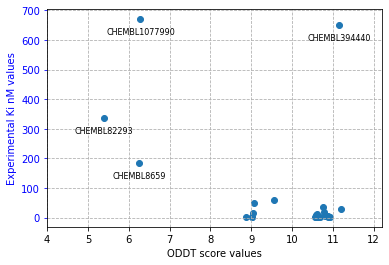

In [31]:
plotScatter(scDic, kiValuesDic, expType='Ki', annotate=True)

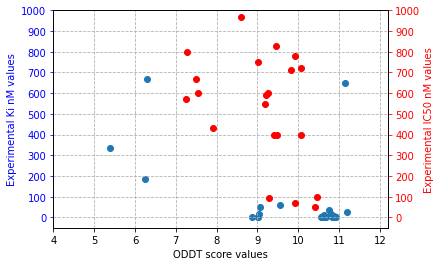

In [32]:
plotScatter(scDic, kiValuesDic, expDic2=ic50ValuesDic)

In [33]:
consKey = 'InConsensus_0.1_n2'
consActDF = activeDF[activeDF[consKey]]
molsInCons = list(set(consActDF['MolName']))


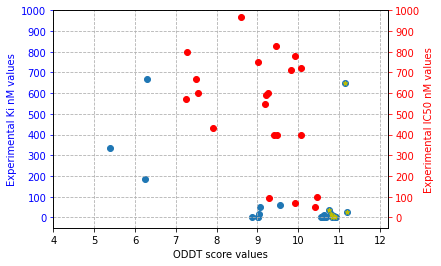

In [34]:
plotScatter(scDic, kiValuesDic, expDic2=ic50ValuesDic, markMols=molsInCons,
           save=f'images/activesExpAffinities_{consKey}.png')